In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from itertools import combinations

import tensorflow as tf
tf.keras.backend.clear_session()

In [2]:
def split_data(perc_train, fingerprint_dataset):
    """
        Takes as input the percentage of fingerprints for training and
        the fingerprint dataset ordered chronologically.
        Returns the training and the test sequence
    """
    index_split = int(len(fingerprint_dataset) * perc_train)
    # train, test
    return fingerprint_dataset[: index_split], fingerprint_dataset[index_split:]


In [3]:
dfX = pd.read_csv("dataXorig.csv")
dfy = pd.read_csv("datayorig.csv")
dfX = dfX.drop(['Unnamed: 0'], axis = 1)
dfy = dfy.drop(['Unnamed: 0'], axis = 1)

In [4]:
X = dfX.values
y = dfy.values

In [5]:
dfX.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,9.666667,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.000000,3.0
1,1.0,15.541667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0
2,1.0,22.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.972222,2.0
3,1.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.0
4,1.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.0


In [6]:
X_train, X_test = split_data(0.4, X)
y_train, y_test = split_data(0.4, y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.40)

In [8]:
# create scaler from training data
scaler = StandardScaler().fit(X_train)

# apply same scaler to both train and test data
# this steps produces numpy matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
def accuracy(preds, actual):
    return ((preds == actual) * 1).sum() / len(actual)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, activation = 'relu',
                               kernel_initializer='random_normal',
                               bias_initializer='random_normal',
                               kernel_regularizer = tf.keras.regularizers.l1(0)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(100, activation = 'relu',
                               kernel_initializer='random_normal',
                               bias_initializer='random_normal',
                               kernel_regularizer = tf.keras.regularizers.l1(0)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(lr = 0.0001)

# lrreduce = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor="val_loss",
#     factor=0.7,
#     patience=30,
#     verbose=0,
#     mode="auto",
#     min_delta=0.0001,
#     cooldown=0,
#     min_lr=0,
# )
# es = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0,
#     patience=400,
#     verbose=0,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=True,
# )

model.compile(optimizer = optimizer,
              loss = loss_fn,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 400)

Train on 2444 samples, validate on 611 samples
Epoch 1/400
2444/2444 [==============================] - 1s 407us/sample - loss: 0.2083 - accuracy: 0.9194 - val_loss: 0.5757 - val_accuracy: 0.8314
Epoch 2/400
2444/2444 [==============================] - 0s 56us/sample - loss: 0.0612 - accuracy: 0.9840 - val_loss: 0.4491 - val_accuracy: 0.9051
Epoch 3/400
2444/2444 [==============================] - 0s 60us/sample - loss: 0.0471 - accuracy: 0.9869 - val_loss: 0.2918 - val_accuracy: 0.9574
Epoch 4/400
2444/2444 [==============================] - 0s 60us/sample - loss: 0.0375 - accuracy: 0.9902 - val_loss: 0.1422 - val_accuracy: 0.9836
Epoch 5/400
2444/2444 [==============================] - 0s 59us/sample - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0649 - val_accuracy: 0.9918
Epoch 6/400
2444/2444 [==============================] - 0s 56us/sample - loss: 0.0279 - accuracy: 0.9918 - val_loss: 0.0347 - val_accuracy: 0.9935
Epoch 7/400
2444/2444 [==============================] - 0s 64us

Epoch 56/400
2444/2444 [==============================] - 0s 54us/sample - loss: 0.0030 - accuracy: 0.9988 - val_loss: 0.0110 - val_accuracy: 0.9967
Epoch 57/400
2444/2444 [==============================] - 0s 54us/sample - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0115 - val_accuracy: 0.9967
Epoch 58/400
2444/2444 [==============================] - 0s 53us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9951
Epoch 59/400
2444/2444 [==============================] - 0s 52us/sample - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0120 - val_accuracy: 0.9967
Epoch 60/400
2444/2444 [==============================] - 0s 56us/sample - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0117 - val_accuracy: 0.9967
Epoch 61/400
2444/2444 [==============================] - 0s 53us/sample - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0124 - val_accuracy: 0.9951
Epoch 62/400
2444/2444 [==============================] - 0s 55us/sample - loss: 0.0022 - accuracy: 1.0000

2444/2444 [==============================] - 0s 56us/sample - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0075 - val_accuracy: 0.9967
Epoch 111/400
2444/2444 [==============================] - 0s 54us/sample - loss: 0.0018 - accuracy: 0.9992 - val_loss: 0.0077 - val_accuracy: 0.9967
Epoch 112/400
2444/2444 [==============================] - 0s 58us/sample - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0068 - val_accuracy: 0.9967
Epoch 113/400
2444/2444 [==============================] - 0s 62us/sample - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0073 - val_accuracy: 0.9967
Epoch 114/400
2444/2444 [==============================] - 0s 61us/sample - loss: 7.5184e-04 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9967
Epoch 115/400
2444/2444 [==============================] - 0s 63us/sample - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.0063 - val_accuracy: 0.9967
Epoch 116/400
2444/2444 [==============================] - 0s 65us/sample - loss: 0.0015 - accuracy: 0.9996 - 

2444/2444 [==============================] - 0s 56us/sample - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0038 - val_accuracy: 0.9984
Epoch 165/400
2444/2444 [==============================] - 0s 61us/sample - loss: 4.0483e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9984
Epoch 166/400
2444/2444 [==============================] - 0s 63us/sample - loss: 6.3249e-04 - accuracy: 0.9996 - val_loss: 0.0031 - val_accuracy: 0.9984
Epoch 167/400
2444/2444 [==============================] - 0s 59us/sample - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy: 0.9984
Epoch 168/400
2444/2444 [==============================] - 0s 53us/sample - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0043 - val_accuracy: 0.9984
Epoch 169/400
2444/2444 [==============================] - 0s 53us/sample - loss: 5.1933e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9984
Epoch 170/400
2444/2444 [==============================] - 0s 53us/sample - loss: 0.0028 - accuracy: 0

2444/2444 [==============================] - 0s 55us/sample - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0066 - val_accuracy: 0.9984
Epoch 218/400
2444/2444 [==============================] - 0s 54us/sample - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0066 - val_accuracy: 0.9984
Epoch 219/400
2444/2444 [==============================] - 0s 59us/sample - loss: 3.8146e-04 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9984
Epoch 220/400
2444/2444 [==============================] - 0s 57us/sample - loss: 0.0012 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9984
Epoch 221/400
2444/2444 [==============================] - 0s 61us/sample - loss: 3.5851e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9984
Epoch 222/400
2444/2444 [==============================] - 0s 66us/sample - loss: 5.4011e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9984
Epoch 223/400
2444/2444 [==============================] - 0s 58us/sample - loss: 2.6573e-04 - accurac

2444/2444 [==============================] - 0s 54us/sample - loss: 7.3390e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 0.9984
Epoch 271/400
2444/2444 [==============================] - 0s 56us/sample - loss: 4.7286e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9984
Epoch 272/400
2444/2444 [==============================] - 0s 54us/sample - loss: 3.1851e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 0.9984
Epoch 273/400
2444/2444 [==============================] - 0s 54us/sample - loss: 4.1693e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 0.9984
Epoch 274/400
2444/2444 [==============================] - 0s 54us/sample - loss: 3.0217e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9984
Epoch 275/400
2444/2444 [==============================] - 0s 57us/sample - loss: 4.5533e-04 - accuracy: 0.9996 - val_loss: 0.0056 - val_accuracy: 0.9984
Epoch 276/400
2444/2444 [==============================] - 0s 65us/sample - loss: 1.6711e-

2444/2444 [==============================] - 0s 68us/sample - loss: 1.1694e-04 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 0.9984
Epoch 324/400
2444/2444 [==============================] - 0s 83us/sample - loss: 8.7354e-05 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9984
Epoch 325/400
2444/2444 [==============================] - 0s 82us/sample - loss: 1.9655e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9984
Epoch 326/400
2444/2444 [==============================] - 0s 65us/sample - loss: 8.7348e-05 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 0.9984
Epoch 327/400
2444/2444 [==============================] - 0s 66us/sample - loss: 6.2177e-05 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9984
Epoch 328/400
2444/2444 [==============================] - 0s 65us/sample - loss: 7.4831e-05 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9984
Epoch 329/400
2444/2444 [==============================] - 0s 70us/sample - loss: 2.2683e-

2444/2444 [==============================] - 0s 63us/sample - loss: 4.4546e-04 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9951
Epoch 377/400
2444/2444 [==============================] - 0s 63us/sample - loss: 1.3522e-04 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 0.9951
Epoch 378/400
2444/2444 [==============================] - 0s 65us/sample - loss: 8.6118e-05 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9951
Epoch 379/400
2444/2444 [==============================] - 0s 65us/sample - loss: 7.9038e-04 - accuracy: 0.9996 - val_loss: 0.0070 - val_accuracy: 0.9967
Epoch 380/400
2444/2444 [==============================] - 0s 63us/sample - loss: 2.5161e-04 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9967
Epoch 381/400
2444/2444 [==============================] - 0s 63us/sample - loss: 8.4446e-05 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9967
Epoch 382/400
2444/2444 [==============================] - 0s 62us/sample - loss: 2.0029e-

In [153]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(2, activation = 'relu',
#                                kernel_initializer='random_normal',
#                                bias_initializer='random_normal'))

# model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# loss_fn = tf.keras.losses.BinaryCrossentropy()
# optimizer = tf.keras.optimizers.Adam(lr = 0.001)

# model.compile(optimizer = optimizer,
#               loss = loss_fn,
#               metrics = ["accuracy"])

# history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 400)

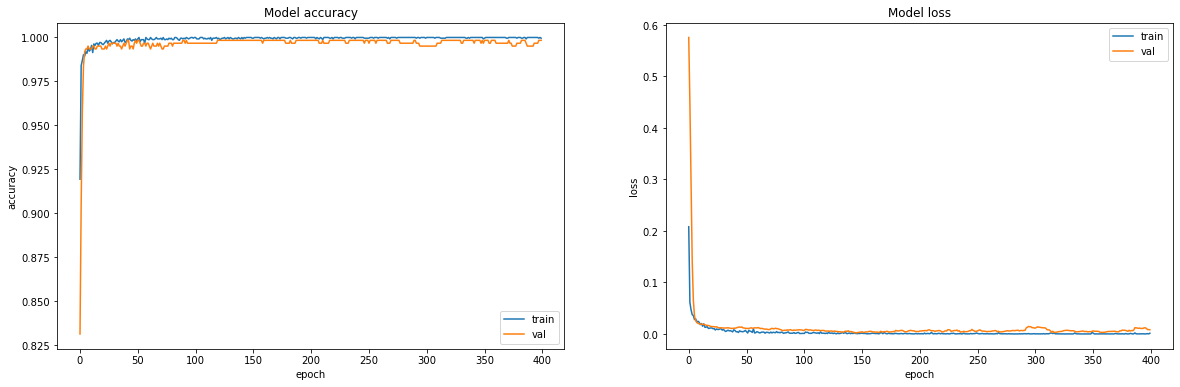

In [11]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

In [16]:
%%time
preds = model.predict_classes(X_test).flatten()

Wall time: 89 ms


In [180]:
tst = y_test.flatten()

In [181]:
((preds == tst) * 1).sum() / len(tst)

0.9962914485165794

In [182]:
lreg = LogisticRegression().fit(X_train, y_train.flatten())

In [183]:
lreg.score(X_test, y_test.flatten())

0.9971640488656196

In [13]:
rf = RandomForestClassifier(n_estimators=10, max_features=3, n_jobs=4)

In [14]:
rf.fit(X_train, y_train.flatten())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [17]:
%%time
rf.score(X_test, y_test.flatten())

Wall time: 106 ms


0.9965095986038395

In [ ]:
plt.hist(model.predict(X_test), bins = 100)
plt.axvline(0.1)
plt.axvline(0.5)

In [ ]:
plt.hist(y_test)

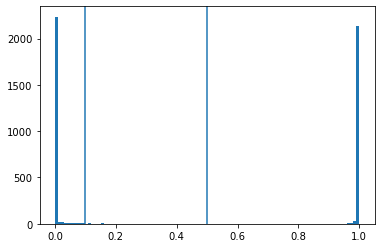

(array([2360.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2224.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

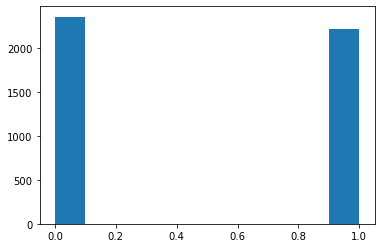

In [198]:
plt.hist(y_test)